# Coping with Dimensionality

# Topics

- The curse of dimensionality
- Principal Component Analysis
- Singular Value Decomposition
- Latent Dirichlet Analysis

## Where are we?

![is there a 4th dimension?](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

# Visualizing data

Humans can't visualize data in more than 3-D

# The curse of dimensionality

- As number of dimensions increase, need exponentially more data to create a generalized model

- $d$ dimensions, $v$ target values: $O(v^d)$ examples

# Dimension Reduction

### Objective
"Project" data from high dimensions to lower dimensions

There will be data loss, but should be within acceptable limits

# Techniques to reduce dimensions

- Principal Component Analysis (PCA)
- Singular Value Decomposition (SVD)
- Latent Dirichlet Analysis


# Principal Component Analysis

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Singular Value Decomposition



# Latent Dirichlet Analysis

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

## Workshop - Plotting Data Projections

In this workshop, we will
- Perform 2-dimensional and 3-dimensional PCA projections, using SVD solvers, on a multi-dimensional dataset
- Try Latent Dirichlet Allocation
- Plot and compare the resulting projections

## Dataset - Motion Capture Hand Postures

5 types of hand postures from 12 users were recorded using unlabeled markers on fingers of a glove in a motion capture environment. Due to resolution and occlusion, missing values are common.

https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures

In [172]:
import pandas as pd

df = pd.read_csv('D:/tmp/Postures/Postures.csv')
df = df.apply(pd.to_numeric, errors='coerce') # convert non-numeric values to NaN
df.head(10)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# skip the first row, which is all zeros
df = df.iloc[1:]

# randomly sample 5000 points to plot
df = df.sample(n=5000)
print('df.shape:', df.shape)

# split into X and y (ignore User column)
X = df.loc[:, 'X0':]
y = df.loc[:, 'Class']

print('X.shape:', X.shape)
print('y.shape:', y.shape)

df.shape: (5000, 38)
X.shape: (5000, 36)
y.shape: (5000,)


In [174]:
from sklearn.decomposition import PCA

# Run PCA to project into 2 components
pca = PCA(n_components=2)
X_pca = pca.fit(X, y).transform(X) # will fail

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Exercise - Removing NaNs for PCA

If you try to run PCA directly above, you should see this error:
> Input contains NaN, infinity or a value too large for dtype('float64').

In this exercise:
1. Replace the NaN values using `sklearn.preprocessing.Imputer`: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html
2. Re-run PCA
3. Plot the PCA projection

For step 1, try different imputation strategies ('mean', 'median', 'most_frequent') to see if they make a difference in the plot and `PCA.explained_variance_ratio_`

Note: `sklearn.impute.SimpleImputer` will replace `sklearn.preprocessing.Imputer` in future versions of sklearn.

In [192]:
# impute missing values because PCA can't handle it
# can't just dropna() because some classes will have no coverage
#
# http://scikit-learn.org/dev/auto_examples/plot_missing_values.html

from sklearn.preprocessing import Imputer

# Your code here

imputer = Imputer()
X = imputer.fit_transform(X)







# Re-run PCA after fixing the data
pca = PCA(n_components=2)
X_pca = pca.fit(X, y).transform(X)

print('Before: X.shape', X.shape)
print('After: X.shape', X_pca.shape)

# Percentage of variance explained by the 2 components (higher is better)
print('PCA: explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

Before: X.shape (5000, 36)
After: X.shape (5000, 2)
PCA: explained variance ratio (first two components): [0.16147464 0.07856412]


Plot the PCA projection in 2D.

(-208.95199100530064,
 227.25160006708015,
 -178.75152219704464,
 190.1268204658002)

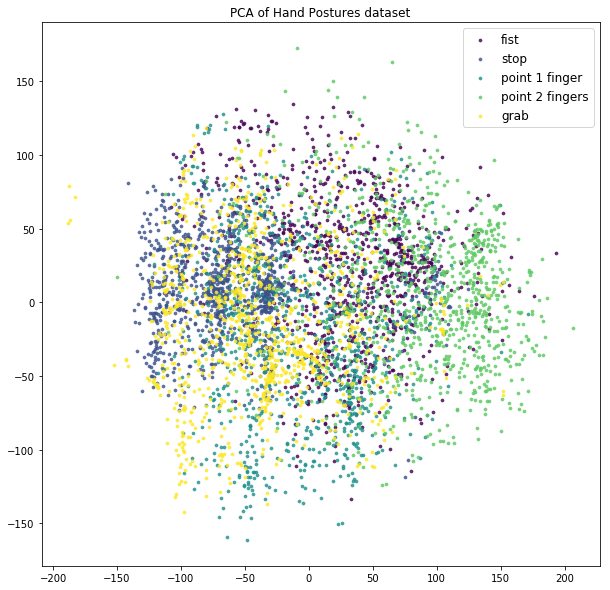

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# target names from the data webpage
target_names = ['fist', 'stop', 'point 1 finger', 'point 2 fingers', 'grab']
n_classes = len(target_names)

fig, ax = plt.subplots(figsize=(10, 10))

# https://matplotlib.org/examples/color/colormaps_reference.html
colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8,
               lw=.5, s=10, label=target_name)
ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='2-D PCA of MoCap Hand Postures dataset')
ax.axis('tight')

## Walkthrough: PCA projection into 3D-space

We can also project the Hand Postures data into 3 components and do a 3-D plot.

Credits: http://scikit-learn.org/dev/auto_examples/decomposition/plot_pca_iris.html

In [191]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit(X, y).transform(X)

print('Before: X.shape', X.shape)
print('After: X.shape', X_pca_3d.shape)

# Percentage of variance explained by the 3 components (higher is better)
print('PCA: explained variance ratio (first three components): %s'
      % str(pca_3d.explained_variance_ratio_))

Before: X.shape (5000, 36)
After: X.shape (5000, 3)
PCA: explained variance ratio (first three components): [0.16147464 0.07856412 0.06563732]


Plot the PCA projection in 3D.

<IPython.core.display.Javascript object>


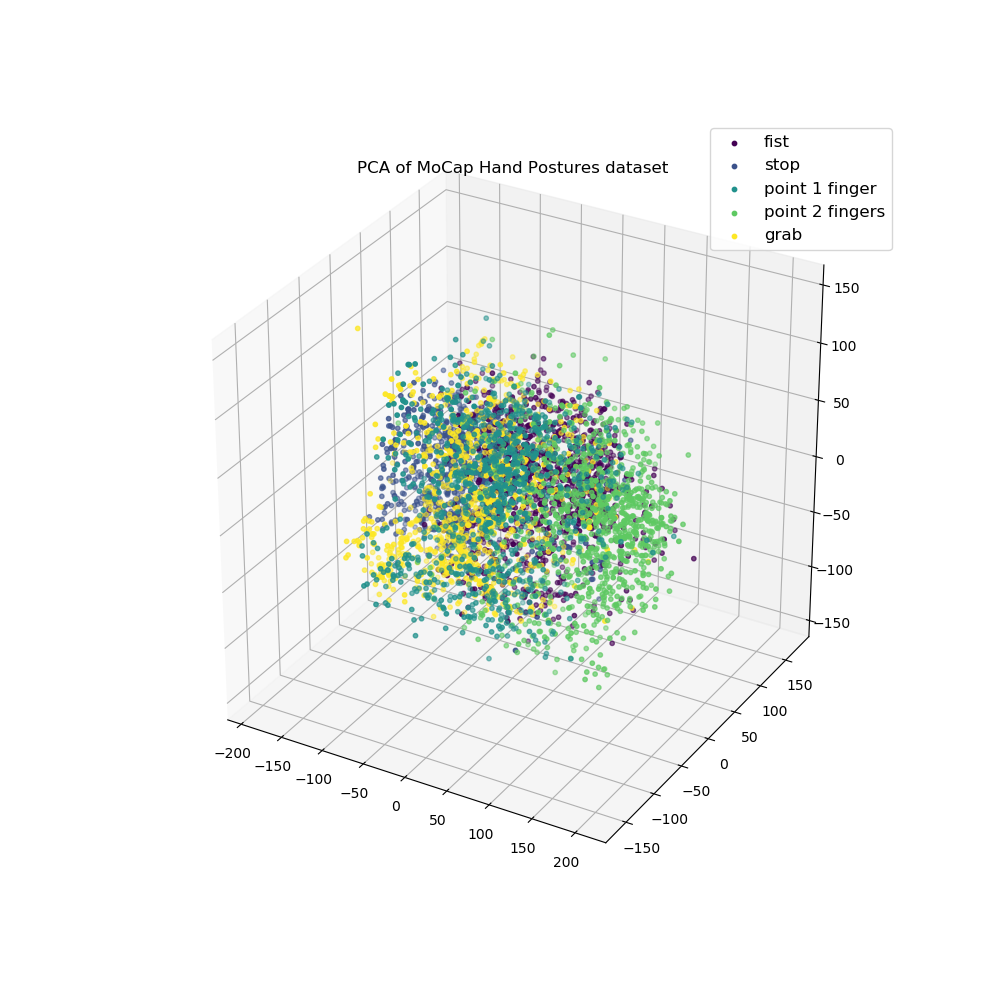

(-207.72683066230357,
 226.09830626601922,
 -177.8035380988147,
 189.0848645238804)

In [198]:
# make the plot interactive, since we're in 3D!
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_pca_3d[y == i, 0], X_pca_3d[y == i, 1], X_pca_3d[y == i, 2],
               s=10, color=color, label=target_name)

ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='3-D PCA of MoCap Hand Postures dataset')
ax.axis('tight')

## Exercise: LDA projection in 3D

Follow the example above, and do a 3D projection with using `sklearn.decomposition.LatentDirichletAllocation`
http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 

LDA uses the Bayes algorithm, so it can't accept negative values.
> ValueError: Negative values in data passed to LatentDirichletAllocation.fit

Tasks:
1. Use sklearn.preprocessing.MinMaxScaler to scale the X values to between [0, 1]
2. Apply `sklearn.decomposition.LatentDirichletAllocation` on the scaled X values. 
  - Note: You do not need to call `explained_variance_ratio_` because it doesn't apply to LDA. 
3. Plot the 3-D distribution

In [196]:
# 1. Scale the X values to between [0, 1]
# 2. Apply LDA with 3 components, try either learning_method='online' or learning_method='batch'

# Your code here

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

lda_3d = LatentDirichletAllocation(n_components=3,
                                   learning_method='online')
X_lda_3d = lda_3d.fit(X_scaled, y).transform(X_scaled)

print('Before: X.shape', X.shape)
print('After: X.shape', X_lda_3d.shape)

# the components
print('LDA: components: %s' % str(lda_3d.components_))

Before: X.shape (5000, 36)
After: X.shape (5000, 3)
LDA: components: [[6.73955047e+02 7.91133701e+02 4.12712496e+02 9.67224907e+02
  7.39501373e+02 4.34389609e+02 8.25471702e+02 7.25055037e+02
  4.03142491e+02 7.37646921e+02 1.03666367e+03 4.96086395e+02
  8.87640595e+02 8.98393724e+02 6.31896641e+02 8.66349331e+02
  8.52710872e+02 4.61875041e+02 8.22816268e+02 8.84108811e+02
  5.93274196e+02 7.88564901e+02 9.43246551e+02 5.63026746e+02
  7.65751531e+02 9.65733385e+02 6.04089290e+02 7.47438607e+02
  7.69396522e+02 5.36493970e+02 8.38462745e+02 7.84095832e+02
  5.49205922e+02 3.33333858e-01 3.33333952e-01 3.33333931e-01]
 [9.01877698e+02 1.52191372e+03 1.05903087e+03 1.23123002e+03
  1.55944836e+03 1.20109914e+03 1.04984662e+03 1.55128259e+03
  1.25895674e+03 1.06755557e+03 1.56301725e+03 1.11301014e+03
  1.18100947e+03 1.54615400e+03 1.29985031e+03 1.17904999e+03
  1.43363385e+03 1.05286975e+03 1.21577505e+03 1.36644828e+03
  1.02650221e+03 1.16444105e+03 1.37132543e+03 8.72226332e+02


<IPython.core.display.Javascript object>


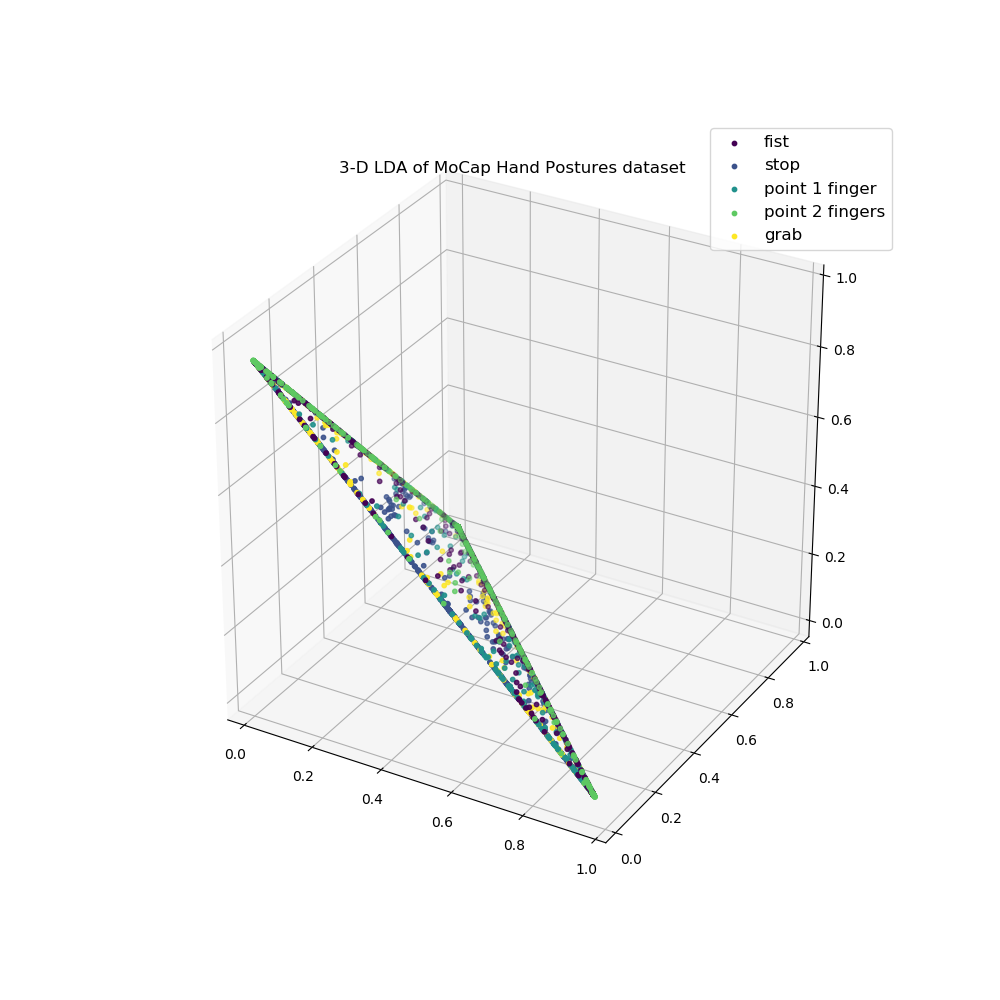

(-0.02754994936422199,
 1.0066740821676834,
 -0.026865086273656573,
 1.0079587948742643)

In [199]:
# 3. Plot the 3D projection
# Your code here

%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, n_classes)]

for color, i, target_name in zip(colors, y.unique(), target_names):
    ax.scatter(X_lda_3d[y == i, 0], X_lda_3d[y == i, 1], X_lda_3d[y == i, 2],
               s=10, color=color, label=target_name)

ax.legend(loc='upper right', shadow=False, scatterpoints=1, fontsize='large')
ax.set(title='3-D LDA of MoCap Hand Postures dataset')
ax.axis('tight')

## Workshop - Curse of Dimensionality

In this workshop, we will explore whether dimensionality reduction can improve a classification model.

We'll use the Hand Postures data